(primer-decibel)=
## Decibel

Sound levels are often described on a decibel scale. But what is actually a decibel, and how does it relate to the signals we are measuring?

Decibel is a relative measure of the ratio of power of two signals on a logarithmic scale. Yet, we often hear noise levels announced in terms of decibels and we have an understanding of what those mean in an "absolute" sense. The hidden reference for sounds in air is $20\mu Pa$, which corresponds to the threshold below which a human usually cannot hear (thus making that sound's level equal to 0dB). In water, however, a difference reference value: $1 \mu Pa$.

The decibel level of a signal with power $P_1$ with respect to a reference signal with power $P_0$ is

$$10 \log_{10}(P_1/P_0)  dB $$

We can see that decibel is a scaled measure of the difference in the logarithm of the power of the signals.

### **Exercise 1: Comparing Power**

Look at the table the decibel levels for breathing and trumpet. How much louder is the trumpet than the breathing?


breathing: 10 dB

trumpet: 110 dB

$100dB = 10\log_{10}\left(\frac{P_1}{P_2}\right)$

The trumpet's power is 10^10 higher than that of breathing.


### **Exercise 2: dB Scaling**

Let's consider two scenarios:

1. 1 person talking

2. 100 people talking

What is $dB$ level of signal 2 with respect to signal 1?

$10\log_{10}(100)=20 dB$


### **Exercise 3: Air vs Water dB**

What is the difference between air and water $dB$ values?

$20\log_{10}(20) = 26 dB$

## Ship vs Background Noise Level Example

We will calculate the dB of a ship signal in the ocean with reference to the background sound when there is no ship passing by. The data is obtained from the [Orcasound hydrophone](https://live.orcasound.net/listen/orcasound-lab) on San Juan Island, WA.

In [1]:
# downloading a ship file
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq' -O ship.wav

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

First we read the signals using the `wavfile` function from the `scipy.io` module.

In [3]:
# reading ship data
ship_samplerate, ship_signal = wavfile.read('ship.wav')

In [4]:
# reading background data
bg_samplerate, bg_signal = wavfile.read('background.wav')

We will display the amplitute of the signals.

Text(0.5, 0, 'Time in seconds')

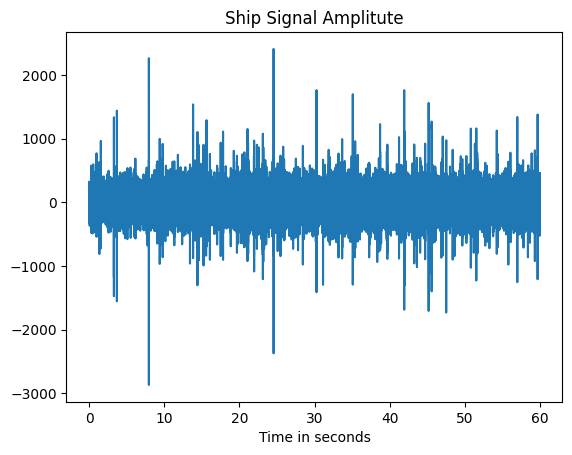

In [5]:
plt.plot(np.linspace(0, len(ship_signal)/ship_samplerate, len(ship_signal)), ship_signal)
plt.title("Ship Signal Amplitute")
plt.xlabel("Time in seconds")

Text(0.5, 0, 'Time in seconds')

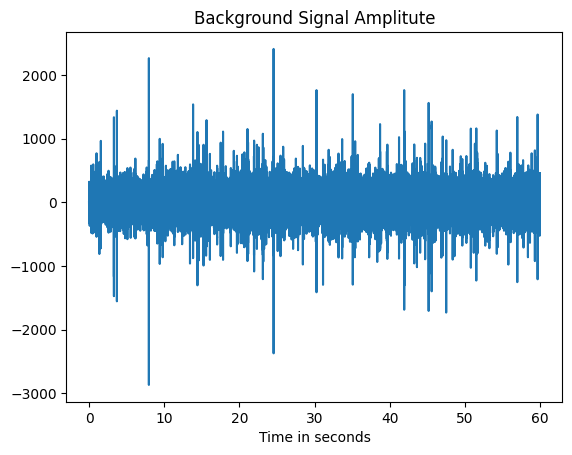

In [6]:
plt.plot(np.linspace(0, len(bg_signal)/bg_samplerate, len(bg_signal)), bg_signal)
plt.title("Background Signal Amplitute")
plt.xlabel("Time in seconds")

We observe that the ranges of amplitude for the two signals are very different: while the background signal ranges $~(-1000,1000)$, the ship signal ranges $(-10000,10000)$.

### Root Mean Squares



The power of the signal can be obtained by calculating the root mean squares of the signal's amplitude $s$ in the time domain:

$p(s) = RMS(s) = \sqrt{\frac{1}{N}\sum_{i=1}^N s_i^2}$,

where $N$ is the number of samples.

In [7]:
# rms for ship signal
rms_ship = np.sqrt(np.mean(np.square(ship_signal.astype('float'))))

print("The root mean square of the ship signal is: " + str(round(rms_ship,2)))

The root mean square of the ship signal is: 132.05


In [8]:
# rms for background signal
rms_bg = np.sqrt(np.mean(np.square(bg_signal.astype('float'))))

print("The root mean square of the background signal is: " + str(round(rms_bg,2)))

The root mean square of the background signal is: 132.05


**Warning!** We converted the signal to `float` to avoid integer overflow. Try to do the calculation with integers, and notice the difference.

### Decibel Computation

The difference in the levels of the two signals is provided in decibels:

$10\log_{10}(P_{\mathrm{ship}}/ P_{\mathrm{bg}}) = 20*\log_{10}(rms_{\mathrm{ship}}/rms_{\mathrm{bg}})$

In [9]:
20 * np.log10(rms_ship/rms_bg)

np.float64(0.0)

23 dB difference corresponds to ~15 ratio in rms, or ~225 ratio in power between the too signals.

### RMS with `librosa`

Root mean square can also be obtained through the built-in function `feature.rms` in the `librosa` library. The function is designed to calculate the power over fixed (potentially overlapping) intervals. However, in this scenario we would like to calculate it for the whole signal so we set the window length to be equal to the length of the signal and the hopping interval to be the same so there is only one interval.

In [10]:
pip -q install librosa


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import librosa

In [12]:
rms_bg = librosa.feature.rms(y=bg_signal, frame_length=len(bg_signal), hop_length=len(bg_signal), center=False)

In [13]:
rms_bg

array([[132.05133]], dtype=float32)

## References

* [What is dB? A Complete Guide for Measuring Sound using Decibel](https://www.hollyland.com/blog/tips/what-is-db)
* Svantek Academy: [Sound Pressure Level](https://svantek.com/academy/sound-pressure-level-spl/)
* Discovery of the Sounds of Sea: [Introduction to Decibels](https://dosits.org/science/advanced-topics/introduction-to-decibels/)